In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def satvpw(T):
    T0=373.15 #K
    e0=101324.6 #Pa
    a = -7.90298*((T0/T)-1)
    b = 5.02808*np.log10(T0/T)
    c = -1.3816*10**-7*10**(-11.344*(1-(T/T0))-1)
    d = 8.1328*10**-3*10**(-3.49149*((T0/T)-1)-1)
    return e0*10**(a+b+c+d)

In [3]:
def satvpi(T):
    T0=273.15 #K
    e0=610.71 #Pa
    a = -9.09718*((T0/T)-1)
    b = 3.56654*np.log10(T0/T)
    c = 0.876793*(1-(T/T0))
    d = 0
    return e0*10**(a+b+c+d)

In [4]:
def satvpg(T):
    return 0.05*(273.15-T)*satvpi(T)+0.05*(T-253.15)*satvpw(T)

In [5]:
T0=273.16 #K
psat0=611.657 #Pascals
LdivR_A=5420 #K
def satvp1(T):
    return psat0*np.exp((-LdivR_A)*((1/T)-(1/T0)))

# Compare satvpw(T) with the idealized saturation vapor pressure function for based on a constant latent heat of vaporization, using the triple point temperature and pressure as the base values.

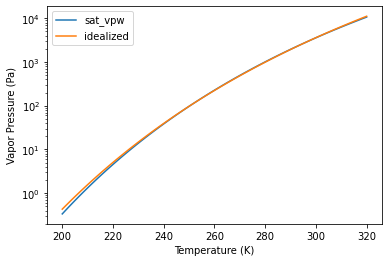

In [6]:
T_values=np.linspace(200,320,100)
satvpw_values=np.array(satvpw(T_values))
idealized_values=np.array(satvp1(T_values))
plt.plot(T_values,satvpw_values,label='sat_vpw')
plt.plot(T_values,idealized_values,label='idealized')
plt.yscale('log')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Vapor Pressure (Pa)')
plt.show()

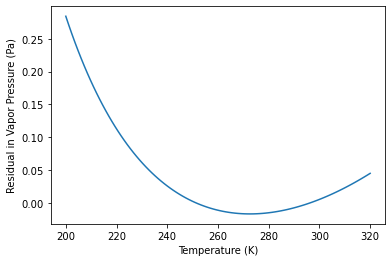

In [7]:
error=(idealized_values-satvpw_values)/satvpw_values
plt.plot(T_values,error)
plt.xlabel('Temperature (K)')
plt.ylabel('Residual in Vapor Pressure (Pa)')
plt.show()

### The idealized function which assumes constant latent heat overestimates the vapor pressure at low temperatures.

# Try using the boiling point pressure and temperature as the reference value for satvp1 and see how the comparison differs.

In [8]:
#Changing reference values for satvp1 to boiling point
T0=373.15 #K
psat0=100000 #Pascals

In [9]:
idealized_values=np.array(satvp1(T_values))

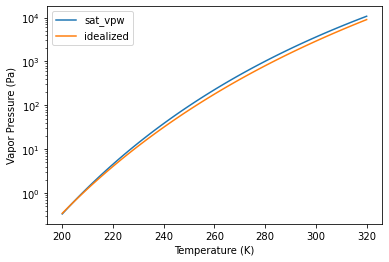

In [10]:
plt.plot(T_values,satvpw_values,label='sat_vpw')
plt.plot(T_values,idealized_values,label='idealized')
plt.yscale('log')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Vapor Pressure (Pa)')
plt.show()

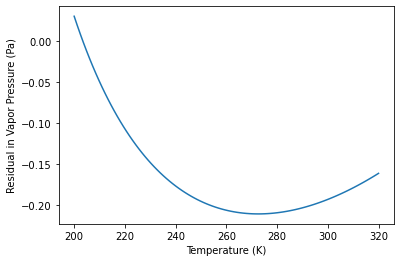

In [11]:
error=(idealized_values-satvpw_values)/satvpw_values
plt.plot(T_values,error)
plt.xlabel('Temperature (K)')
plt.ylabel('Residual in Vapor Pressure (Pa)')
plt.show()

### The idealized function with the boiling point as reference values underestimates the vapor pressure at higher temperatures. It appears that the error is closer to zero over a wider range of temperatures with the triple point as reference values.

# Compare the empirical and idealized vapor pressures for ice in the range 150K to 273K.

In [12]:
#Changing LdivR_A for latent heat of sublimation
T0=273.16 #K
psat0=611.657 #Pascals
LdivR_A = 2260/0.46152
print(LdivR_A)

4896.862541168313


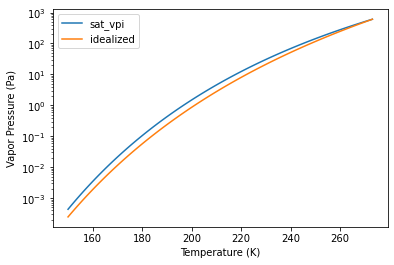

In [13]:
T_values=np.linspace(150,273,100)
satvpi_values=np.array(satvpi(T_values))
idealized_values=np.array(satvp1(T_values))
plt.plot(T_values,satvpi_values,label='sat_vpi')
plt.plot(T_values,idealized_values,label='idealized')
plt.yscale('log')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Vapor Pressure (Pa)')
plt.show()

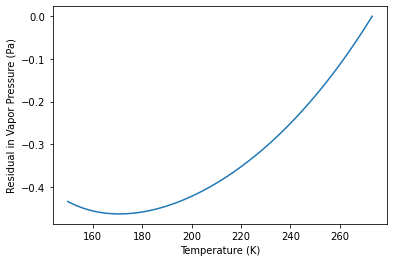

In [14]:
error=(idealized_values-satvpi_values)/satvpi_values
plt.plot(T_values,error)
plt.xlabel('Temperature (K)')
plt.ylabel('Residual in Vapor Pressure (Pa)')
plt.show()

### The idealized function for vapor pressure over ice underestimates at all temperatures.

# Compare satvpw(T) with a simplified function consisting of the constant L function for ice below the triple point and the constant L function for liquid water above the triple point.

In [15]:
T0=273.16 #K
psat0=611.657 #Pascals
def satvp1(T):
    if T<273.16:
        LdivR_A = 2260/0.46152
    if T>273.16:
        LdivR_A = 5420
    return psat0*np.exp((-LdivR_A)*((1/T)-(1/T0)))

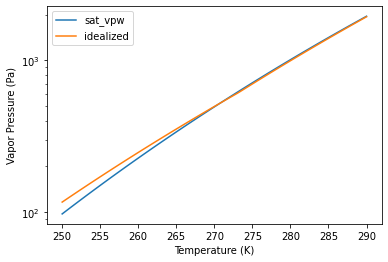

In [16]:
T_values=np.linspace(250,290,100)
satvpw_values=np.array(satvpw(T_values))
idealized_values=np.array([satvp1(T_values[i]) for i in range(len(T_values))])
plt.plot(T_values,satvpw_values,label='sat_vpw')
plt.plot(T_values,idealized_values,label='idealized')
plt.yscale('log')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Vapor Pressure (Pa)')
plt.show()

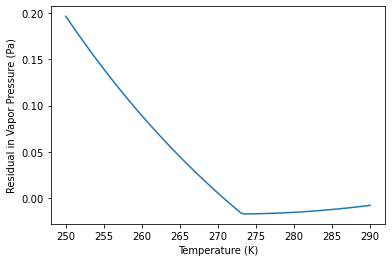

In [17]:
error=(idealized_values-satvpw_values)/satvpw_values
plt.plot(T_values,error)
plt.xlabel('Temperature (K)')
plt.ylabel('Residual in Vapor Pressure (Pa)')
plt.show()

### The idealized function overestimates in the ice regime and is fairly close to correct in the water regime.